In [1]:
import numpy as np
import pandas as pd
import scipy as s
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("cleaned_autos.csv")

In [3]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,Privat,Angebot,480,Test,Limousine,1993,Manuell,0,Golf,150000,3,Benzin,Volkswagen,Nein,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_sportback_2.7_tdi,Privat,Angebot,18300,Test,Coupe,2011,Manuell,190,A4,125000,5,Diesel,Audi,Ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_grand_cherokee_""overland""",Privat,Angebot,9800,Test,Suv,2004,Automatik,163,Grand,125000,8,Diesel,Jeep,Nein,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,Golf_4_1_4__3türer,Privat,Angebot,1500,Test,Kleinwagen,2001,Manuell,75,Golf,150000,6,Benzin,Volkswagen,Nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_fabia_1.4_tdi_pd_classic,Privat,Angebot,3600,Test,Kleinwagen,2008,Manuell,69,Fabia,90000,7,Diesel,Skoda,Nein,2016-03-31,0,60437,2016-04-06 10:17:21


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367542 entries, 0 to 367541
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          367542 non-null  object
 1   name                 367542 non-null  object
 2   seller               367542 non-null  object
 3   offerType            367542 non-null  object
 4   price                367542 non-null  int64 
 5   abtest               367542 non-null  object
 6   vehicleType          367542 non-null  object
 7   yearOfRegistration   367542 non-null  int64 
 8   gearbox              367542 non-null  object
 9   powerPS              367542 non-null  int64 
 10  model                367542 non-null  object
 11  kilometer            367542 non-null  int64 
 12  monthOfRegistration  367542 non-null  int64 
 13  fuelType             367542 non-null  object
 14  brand                367542 non-null  object
 15  notRepairedDamage    367542 non-nu

In [5]:
data.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

##### 1.The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?

**1.Use Appropriate Data Types:**

   Choose the right data types for your variables. For example, use int8 or int16 instead of int32 or int64 if the values can fit within the smaller data types.

   Use float32 instead of float64 if your data doesn’t require high precision.

**2. Downcast Numeric Data:**

   Downcast numeric columns using Pandas to reduce memory usage.

   df['column_name'] = pd.to_numeric(df['column_name'], downcast='integer')
    
**3. Remove Unnecessary Columns:**

   Remove columns that are not needed for analysis, reducing the overall memory footprint.

**4. Use Categorical Data:**

   Convert categorical variables to the category data type, especially if the number of unique categories is significantly lower    than the number of rows. This can be done using the .astype('category') method in pandas.

**5. Compress Data:**

   Use appropriate compression techniques, such as gzip or parquet format, especially if you are saving your data to disk.          Libraries like Pandas and Dask support reading and writing compressed files.

**6. Handle Missing Values Efficiently:**

   If a column has a lot of missing values, consider using a data type like float32 instead of float64 if possible.
   If appropriate, you can fill missing values with a placeholder instead of using a NaN, reducing memory usage.

**7. Use Sparse Data Structures:**

   For matrices with a lot of zero values, consider using sparse data structures. Libraries like SciPy provide data structures      for handling sparse matrices efficiently.

**8. Process Data in Chunks:**

   When processing large datasets, consider processing the data in smaller chunks using libraries like Dask or Modin. These        libraries can handle data in chunks, reducing the overall memory requirement.

**9. Optimize Text Data:**

   If your dataset contains text data, consider techniques like text encoding, stemming, or lemmatization to reduce the size of    text fields.

**10. Use External Storage or Databases:**

   For extremely large datasets, consider storing the data in external databases (e.g., SQL databases) and fetching only the        necessary parts of the data into memory when needed.   

##### 2. What is the Average price of vehicle by fuel type and gearbox type.Give a plot.

In [6]:
avg_price_of_vehicle=data.groupby(["fuelType","gearbox"])[["price"]].mean()

In [7]:
avg_price_of_vehicle

price
fuelType gearbox                
Andere   Automatik   3127.185185
         Manuell     2543.164062
Benzin   Automatik  11512.902986
         Manuell     9799.083665
Cng      Automatik   6631.000000
         Manuell     4461.487572
Diesel   Automatik  20971.145118
         Manuell     8650.747973
Elektro  Automatik  11522.909091
         Manuell     3944.888889
Hybrid   Automatik  14715.969697
         Manuell    12278.607843
Lpg      Automatik  22535.269211
         Manuell     3229.065881

In [8]:
avg_price_of_vehicle=avg_price_of_vehicle.reset_index()

In [9]:
avg_price_of_vehicle

,fuelType,gearbox,price
0,Andere,Automatik,3127.185185
1,Andere,Manuell,2543.164062
2,Benzin,Automatik,11512.902986
3,Benzin,Manuell,9799.083665
4,Cng,Automatik,6631.000000
5,Cng,Manuell,4461.487572
6,Diesel,Automatik,20971.145118
7,Diesel,Manuell,8650.747973
8,Elektro,Automatik,11522.909091
9,Elektro,Manuell,3944.888889


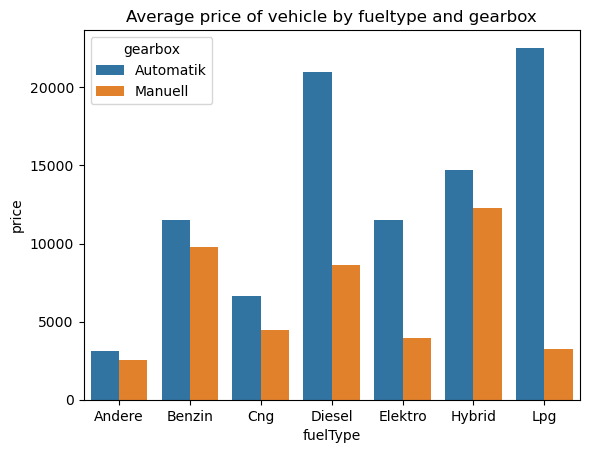

In [10]:
sns.barplot(data=avg_price_of_vehicle, x="fuelType", y="price", hue="gearbox")
plt.title("Average price of vehicle by fueltype and gearbox")
plt.show()

##### 3.What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot.

In [11]:
avg_power_of_vehicle=data.groupby(["vehicleType","gearbox"])[["powerPS"]].mean()

In [12]:
avg_power_of_vehicle=avg_power_of_vehicle.reset_index()

In [13]:
avg_power_of_vehicle

,vehicleType,gearbox,powerPS
0,Andere,Automatik,169.656766
1,Andere,Manuell,92.989595
2,Bus,Automatik,137.887810
3,Bus,Manuell,109.218067
4,Cabrio,Automatik,183.224539
5,Cabrio,Manuell,131.526974
6,Coupe,Automatik,213.727427
7,Coupe,Manuell,150.958616
8,Kleinwagen,Automatik,72.619872
9,Kleinwagen,Manuell,66.977733


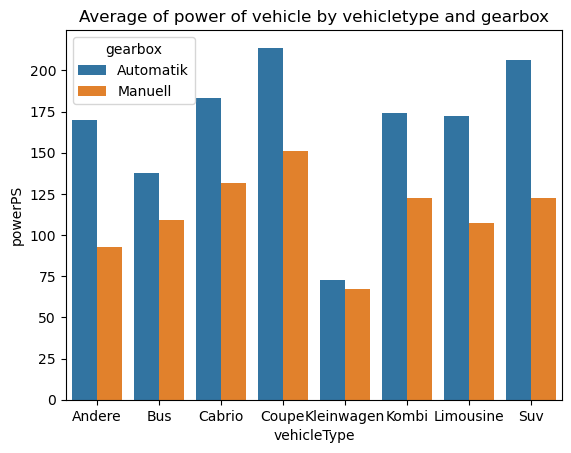

In [14]:
sns.barplot(data=avg_power_of_vehicle, x="vehicleType", y="powerPS", hue="gearbox")
plt.title("Average of power of vehicle by vehicletype and gearbox")
plt.show()

##### 4. What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this.

In [15]:
avg_price_of_vehicle=data.groupby(["brand","vehicleType"])[["price"]].mean()
avg_price_of_vehicle=avg_price_of_vehicle.reset_index()
avg_price_of_vehicle

,brand,vehicleType,price
0,Alfa_romeo,Andere,3153.333333
1,Alfa_romeo,Cabrio,9147.179487
2,Alfa_romeo,Coupe,6897.190083
3,Alfa_romeo,Kleinwagen,4466.242678
4,Alfa_romeo,Kombi,3580.161926
...,...,...,...
283,Volvo,Coupe,6040.930556
284,Volvo,Kleinwagen,3912.714286
285,Volvo,Kombi,9058.724448
286,Volvo,Limousine,5071.679878


Text(0.5, 1.0, 'Average price of vehicle by brand and vehicletype')

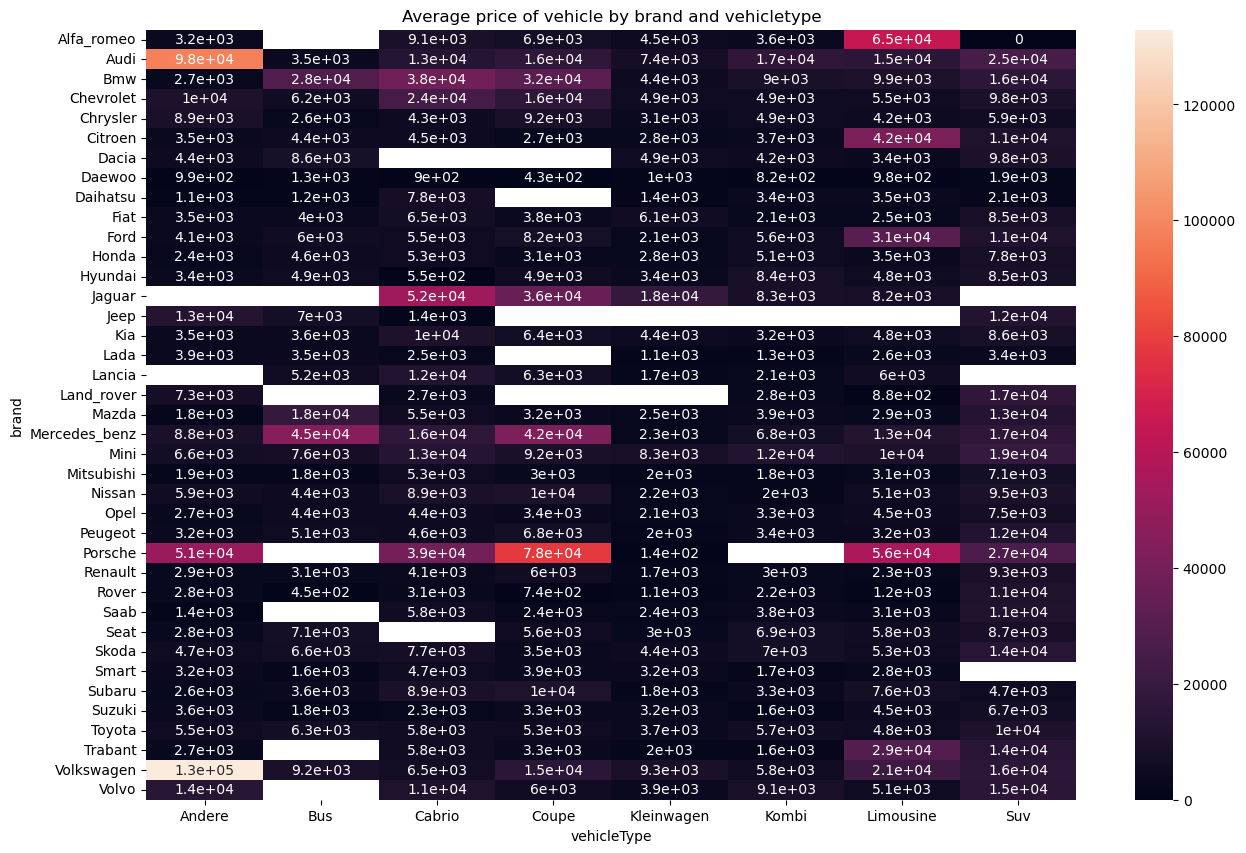

In [16]:
plt.figure(figsize=(15, 10))
heatmap=avg_price_of_vehicle.pivot(index="brand", columns="vehicleType", values="price")
sns.heatmap(heatmap,annot=True)
plt.title("Average price of vehicle by brand and vehicletype")